In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn as sk
import sklearn.neural_network as sknn
from sklearn.preprocessing import MinMaxScaler

In [2]:
CrossData = np.loadtxt('crossnn.txt')

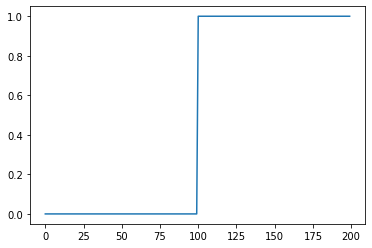

In [3]:
TrainData = CrossData[:200,:2]
Class1 = CrossData[:100,:2]
Class2 = CrossData[100:,:2]
Labels = CrossData[:200,2:]-1
Labels = np.reshape(Labels,(200,))
plt.plot(Labels)
plt.show()

Text(0.5, 1.0, 'Cross Data Classes')

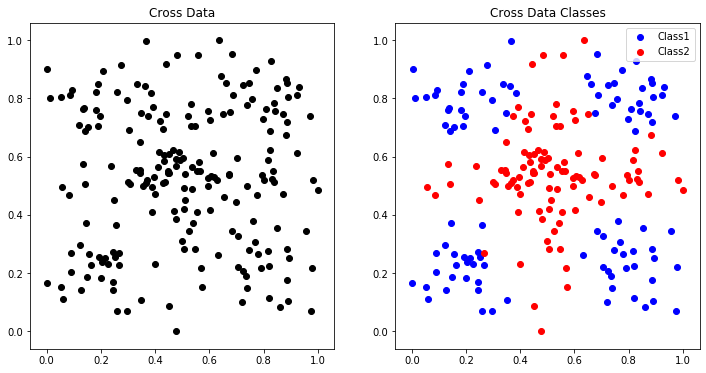

In [4]:
CrossFig = plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(TrainData[:,0], TrainData[:,1], c = 'k')
plt.title('Cross Data')
plt.subplot(1,2,2)
plt.scatter(Class1[:,0], Class1[:,1],c='b')
plt.scatter(Class2[:,0], Class2[:,1],c='r')
plt.legend(['Class1', 'Class2'])
plt.title('Cross Data Classes')

# Look at combinations of these values
## Number of Hidden Units range [2,4,8,12]
## LearnRateInit [0.001, 0.01, 0.05, 0.1]
## Momentum [0, 0.2,0.6, 0.9]

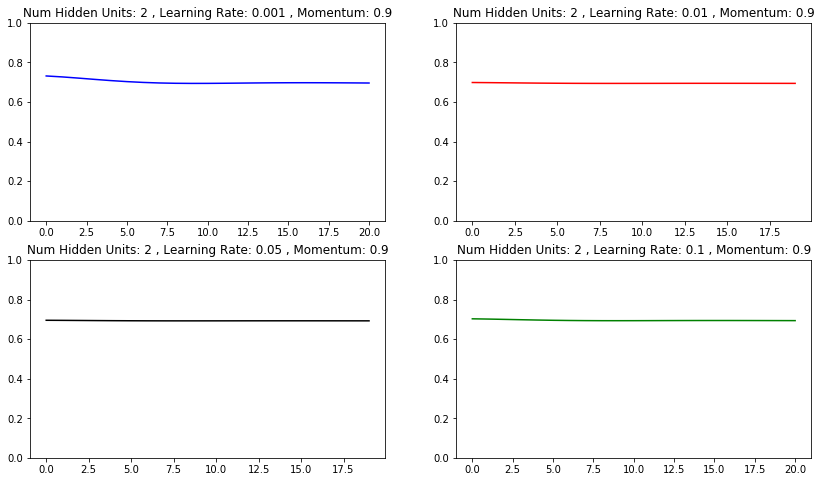

Hit any key to continue... 
On to the next parameters ...





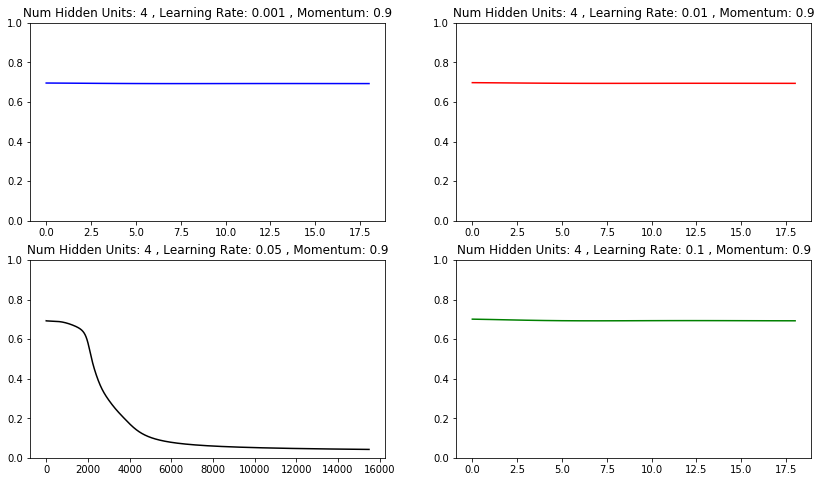

Hit any key to continue... 
On to the next parameters ...
The End!


In [23]:
### TAKE OUT LOOP FOR STUDENT VERSION ###
#for H,HNum in zip((2,4,8,12),[1,2,3,4]): #range(2,9,2):
for H in [2,4]:#[2,4,8,12]:
    CrossANNs = list()
    LossCurves = list()
    figH = plt.figure(H,figsize = (14,8))
    for LearnRateInit,LR in zip((0.001,0.01,0.05,0.1), [1,2,3,4]):
        HiddenLayerSizes  = H
        NonLinearity      = 'logistic'
        TrainingType      = 'sgd'
        L2RegCoefficient  = 0
        BatchSize         = 1
        LearnRate         = 'constant'
        LearnRateInit     = 0.1
        MaxNumIterations  = 30000
        Verbose           = False
        Momentum          = 0.9
        UseValidation     = False
        Shuffle           = True
        PercentValidation = 0.2
        MinChange         = 1e-6

        InitCrossANN = sknn.MLPClassifier(hidden_layer_sizes = HiddenLayerSizes,\
                                     activation = NonLinearity,\
                                     solver     = TrainingType,\
                                     alpha      = L2RegCoefficient,\
                                     learning_rate = LearnRate,\
                                     learning_rate_init = LearnRateInit,\
                                     max_iter      = MaxNumIterations,\
                                     verbose       = Verbose,\
                                      momentum     = Momentum,\
                                     shuffle       = True,\
                                     early_stopping = False,\
                                     validation_fraction = PercentValidation,\
                                     tol           = MinChange)
        TrainedCrossANN = InitCrossANN.fit(TrainData, Labels)
        #print(CrossANNs, type(CrossANNs))
        CrossANNs.append(TrainedCrossANN)
        LossCurves.append(TrainedCrossANN.loss_curve_)

    print('\n\n')
    Clrs = ['blue','red','black','green']
    for ANN,LR,LRNum in zip(CrossANNs, (0.001,0.01,0.05,0.1), [0,1,2,3]):
        plt.subplot(2,2,LRNum+1)
        plt.plot(ANN.loss_curve_, c = Clrs[LRNum])
        plt.ylim([0,1])
        TitleStr = f'Num Hidden Units: {H} , Learning Rate: {LR} , Momentum: {Momentum}'
        plt.title(TitleStr)
    plt.show()
    print('Hit any key to continue...', end = ' ')
    input()
    print('On to the next parameters ...')
    plt.close(fig=figH)
print('The End!')

In [13]:
plt.close(1)

In [ ]:
# CrossANN = sknn.MLPClassifier(hidden_layer_sizes = HiddenLayerSizes,\
#                              activation = NonLinearity,\
#                              solver     = TrainingType,\
#                              alpha      = L2RegCoefficient,\
#                              learning_rate = LearnRate,\
#                              learning_rate_init = LearnRateInit,\
#                              max_iter      = MaxNumIterations,\
#                              verbose       = Verbose,\
#                               momentum     = Momentum,\
#                              shuffle       = True,\
#                              early_stopping = False,\
#                              validation_fraction = PercentValidation,\
#                              tol           = MinChange)

In [ ]:
# TrainedCrossANN = CrossANN.fit(TrainData, Labels)

In [ ]:
# ActualOutputs = TrainedCrossANN.predict(TrainData)
# TrainedCrossANN

In [ ]:
# plt.plot(ActualOutputs, c='r')
# plt.plot(Labels,c='b')
# np.amax(ActualOutputs)

In [ ]:
plt.plot(TrainedCrossANN.loss_curve_)

In [ ]:
np.shape(TrainedCrossANN.coefs_[1])